# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

<span style="color:green"> Le tail corrections compensano l'aver utilizzato un potenziale con un cutoff a distanza $r_{c}$ oltre la quale il potenziale è considerato nullo. Le tail corrections per l'energia potenziale e la pressione sono rispettivamente (avendo posto $\epsilon = 1$):  
    $vtail = \frac{8 \pi \rho}{9r_{c}^9}-\frac{8 \pi \rho}{3r_{c}^3}$,  
    $ptail = 32 \pi \rho \left[\frac{1}{9r_{c}^9}-\frac{1}{6r_{c}^3}\right]$.
    

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

### <span style="color:green"> Equilibrazione

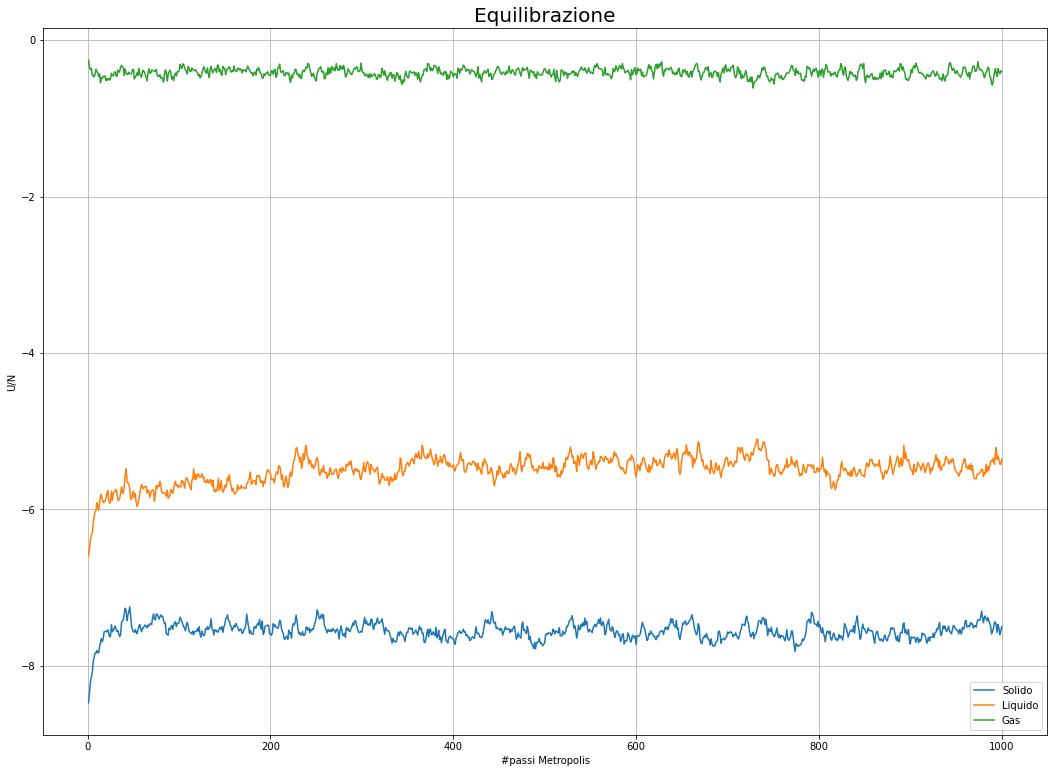

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 1000
x = np.arange(N)+1
fase = ["Solido", "Liquido", "Gas"]
dati = ["Equil_s.dat", "Equil_l.dat", "Equil_g.dat"]

plt.figure(figsize=(18,13))
for i in range(0,3):
    U = np.loadtxt(dati[i])
    plt.plot(x,U, label=fase[i])
    plt.title('Equilibrazione', fontsize = 20)
    plt.xlabel('#passi Metropolis')
    plt.ylabel('U/N')
    plt.legend()
    plt.grid()


plt.show()

<span style="color:green"> Avendo eseguito le 3 equilibrazioni partendo dalla configurazione fcc e dalle temperature corrette per ogni fase, scegliendo dei valori del passo (delta) tali da avere un rate di accettazione intorno al 50% (delta = 0.12 per il solido, delta = 0.2 per il liquido e delta = 7 per il gas), posso considerare che dopo 1000 passi del Metropolis l'equilibrio sia stato ampiamente raggiunto (il gas si equilibra prima perchè, anche aumentando il delta, il rate di accettazione non scende sotto il 60%, mentre per solido e liquido è attorno al 50%).

### <span style="color:green"> Dati

<span style="color:green"> Ho prodotto 500000 valori dell'energia potenziale per particella per ciascuna delle 3 fasi.

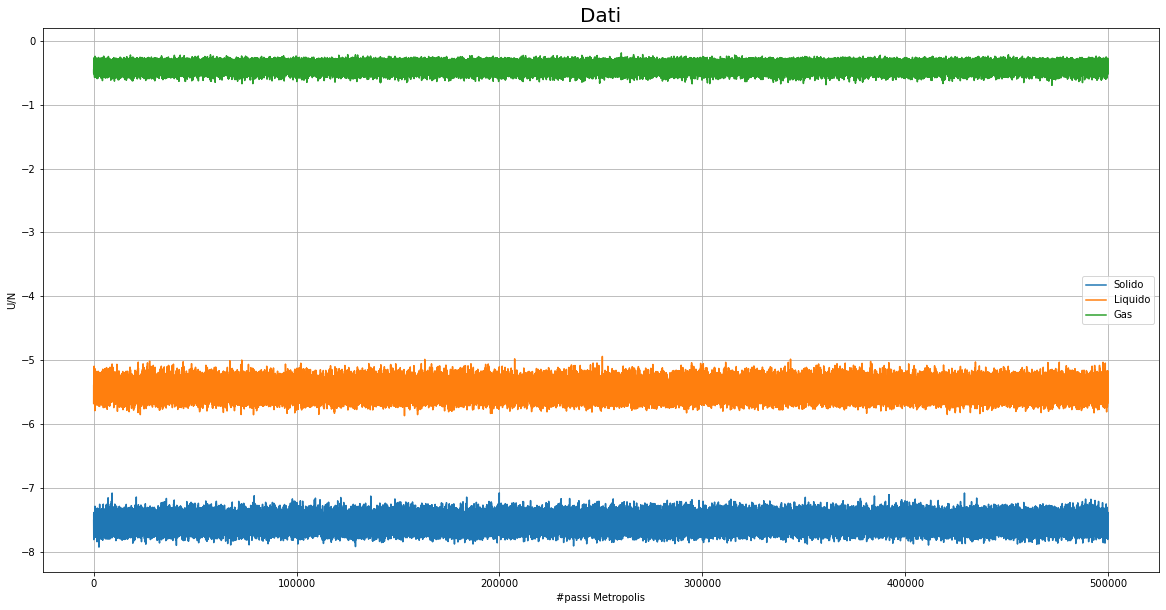

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 500000
x = np.arange(N)+1
fase = ["Solido", "Liquido", "Gas"]
dati = ["Equil_s5.dat", "Equil_l5.dat", "Equil_g5.dat"]

plt.figure(figsize=(20,10))
for i in range(0,3):
    U = np.loadtxt(dati[i])
    plt.plot(x,U, label=fase[i])
    plt.title('Dati', fontsize = 20)
    plt.xlabel('#passi Metropolis')
    plt.ylabel('U/N')
    plt.legend()
    plt.grid()


plt.show()

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

<span style="color:green"> L'autocorrelazione è data da: $ A_{c}(\tau)=\frac{cov_{[x,x]}(t,t+\tau)}{\sigma_{x}^2}$ (essendo che le medie dei valori non dipendono da t).

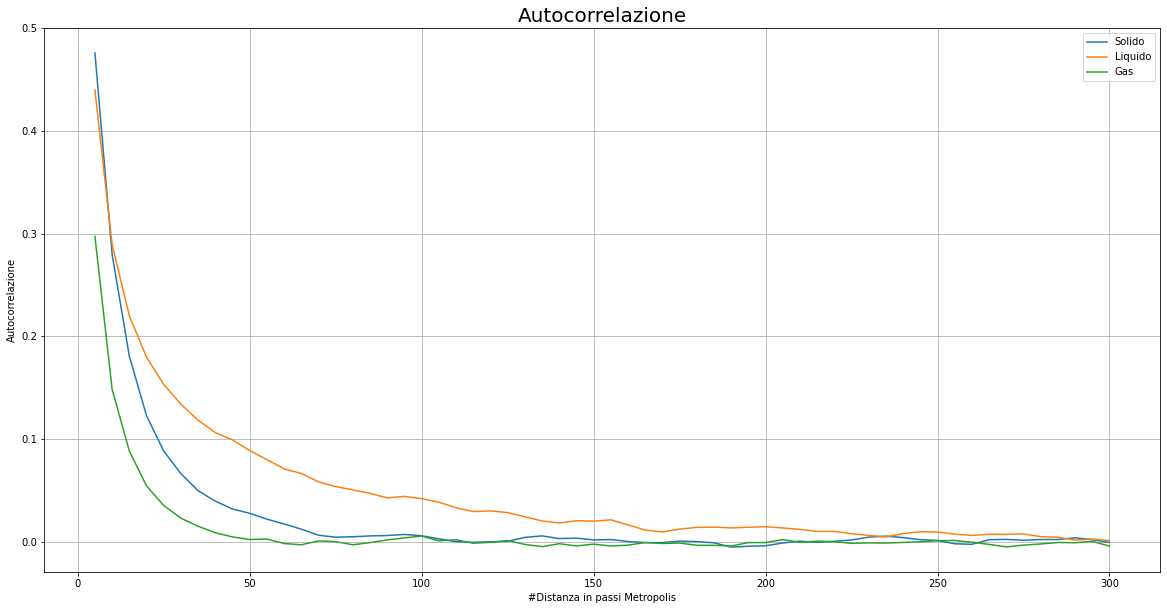

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fase = ["Solido", "Liquido", "Gas"]
Dati = ["Equil_s5.dat", "Equil_l5.dat", "Equil_g5.dat"]

def Ac (dati,passi):
    covarianza = np.cov(dati[:-passi], dati[passi:])
    return covarianza[0,1]/covarianza[0,0]

autocorrelazione = []
passi = [i for i in range (5,301,5)]
plt.figure(figsize=(20,10))
for j in range(3):
    dati = np.loadtxt(Dati[j])
    for t in passi:
        autocorrelazione.append(Ac(dati,t))
    plt.plot(passi, autocorrelazione, label=fase[j])
    autocorrelazione.clear()
    plt.title('Autocorrelazione', fontsize = 20)
    plt.xlabel('#Distanza in passi Metropolis')
    plt.ylabel('Autocorrelazione')
    plt.legend()
    plt.grid()


plt.show()

<span style="color:green"> Per gas, solido e liquido rispettivamente attorno a 50, 75 e 240 passi Metropolis di distanza tra una misura e l'altra l'autocorrelazione raggiunge all'incirca lo zero; prendendo blocchi da 2000 passi ciascuno nelle simulazioni, posso considerare le misure scorrelate (nella lunghezza dei blocchi sono comprese diverse lunghezze di correlazione in tutti e 3 i casi).

<span style="color:green"> Successivamente valuto l'incertezza al variare della lunghezza dei blocchi L.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def mb(dati,N):
    L = int(len(dati)/N)
    tot=0
    tot2=0
    for i in range(N):
        sum = 0
        for j in range(L):
            sum += dati[j+i*L]
        sum/=L 
        tot += sum
        tot2 += (sum)**2 

    tot/=N # Cumulative average
    tot2/=N # Cumulative square average
    err = math.sqrt((tot2-tot**2)/N) # Statistical uncertainty
    return err
    


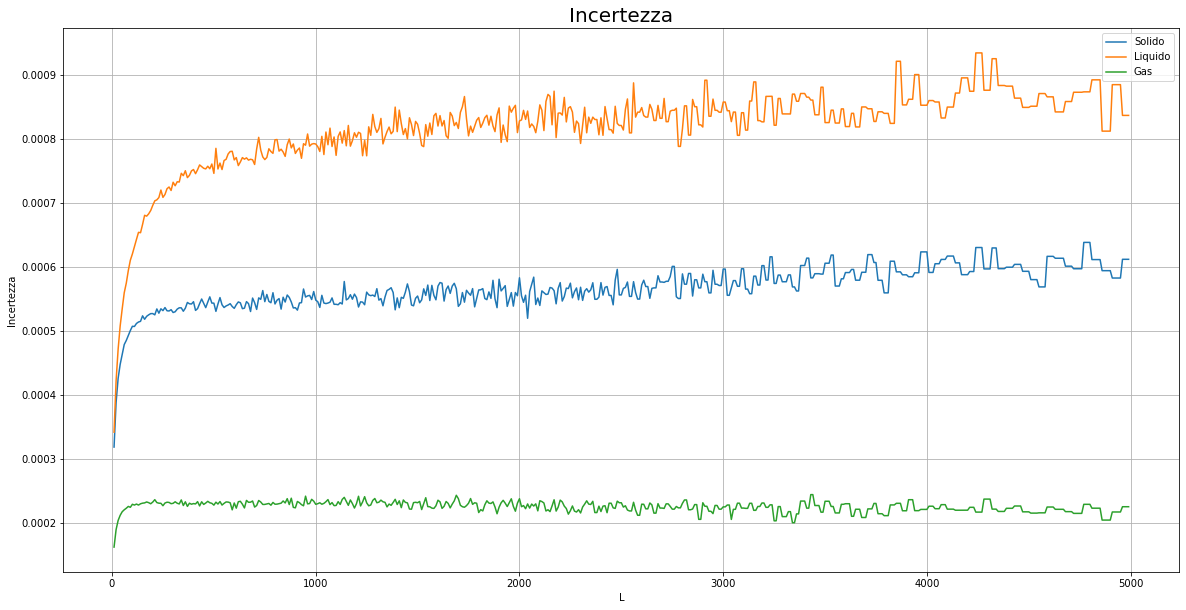

In [5]:
fase = ["Solido", "Liquido", "Gas"]
Dati = ["Equil_s5.dat", "Equil_l5.dat", "Equil_g5.dat"]
M=500000
x=[]
err=[]
plt.figure(figsize=(20,10))
for j in range(3):
    dati = np.loadtxt(Dati[j])
    for L in range(10,5000,10):
        N=int(M/L)
        err.append(mb(dati,N))
        x.append(L)
    plt.plot(x, err, label=fase[j])
    err.clear()
    x.clear()
    plt.title('Incertezza', fontsize = 20)
    plt.xlabel('L')
    plt.ylabel('Incertezza')
    plt.legend()
    plt.grid()


plt.show()

<span style="color:green"> In tutti e 3 i casi si nota che, mentre per piccoli L l'incertezza cresce con L, per valori di L più grandi l'incertezza si stabilizza attorno a un valore costante. Il numero di elementi per blocco usati nelle simulazioni L=2000 cade nella zona costante ed è quindi una buona scelta.

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

<span style="color:green"> Per il calcolo della distribuzione radiale sfrutto il fatto che nel codice già calcolo la distanza fra tutte le coppie di particelle ogni passo: se le trovo a una distanza inferiore alla metà della lunghezza della cella, aggiungo +2 al bin corrispondende dell'istogramma che sto creando(2 perchè considero la coppia una sola volta). L'istogramma va poi normalizzato con la quantità $\rho N \Delta V(r)$, con $\Delta V(r)=\frac{4 \pi}{3} \left[(r+dr)^3-r^3\right]$ ($r$ è la posizione del valor medio della base del bin che considero).

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

<span style="color:green"> Nella simulazione ho utilizzato unità ridotte; per avere i risultati nel sistema internazionale devo fare le seguenti conversioni:

<span style="color:green"> $$V = \epsilon V^{*}, \quad P = \frac{\epsilon}{\sigma^{3}} P^{*}$$

<span style="color:green"> ed essendo $\epsilon/k_B = 120 $ K, $\epsilon = 0.0103$ eV.

### <span style="color:green"> Solido

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Fattori di conversione
epsilon = 0.0103 # in eV
rapp = 120       # in K (espilon/Kb)
sigma = 0.34     # in nm

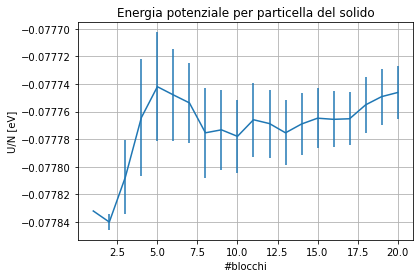

In [15]:
Epot, Epot_err = np.loadtxt("output_epotS.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon

x = np.arange(20)+1

plt.figure()
plt.errorbar(x,Epot,yerr=Epot_err) 
plt.xlabel("#blocchi")
plt.ylabel("U/N [eV]")
plt.title("Energia potenziale per particella del solido")
plt.grid(True)
plt.show()

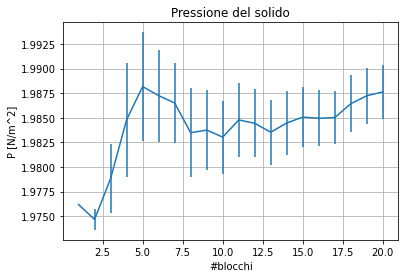

In [11]:
Pres, Pres_err = np.loadtxt("output_presS.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon/pow(sigma,3)

x = np.arange(20)+1

plt.figure()
plt.errorbar(x,Pres,yerr=Pres_err) 
plt.xlabel("#blocchi")
plt.ylabel("P [N/m^2]")
plt.title("Pressione del solido")
plt.grid(True)
plt.show()

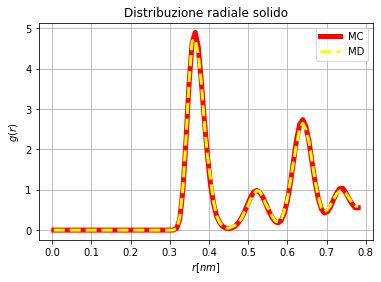

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = (np.arange(100)+0.5)*(108/1.1)**(1/3)/(2*100)*sigma
plt.figure()
gr = np.loadtxt("output_grS.dat", usecols=1)
grMD = np.loadtxt("output_grS_MD.dat", usecols=1)
plt.plot(x,gr, label='MC', linewidth=5, color='r')
plt.plot(x,grMD, label='MD', linestyle='--', linewidth=3, color='yellow')
plt.title("Distribuzione radiale solido")
plt.xlabel("$r [nm]$")
plt.ylabel("$g(r)$")
plt.legend()
plt.grid()


plt.show()

### <span style="color:green"> Liquido

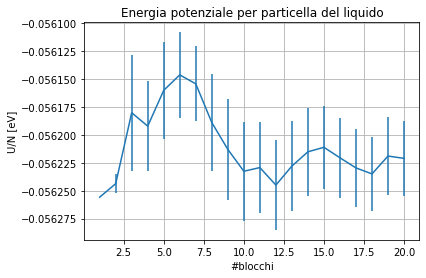

In [23]:
Epot, Epot_err = np.loadtxt("output_epotL.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon

x = np.arange(20)+1

plt.figure()
plt.errorbar(x,Epot,yerr=Epot_err) 
plt.xlabel("#blocchi")
plt.ylabel("U/N [eV]")
plt.title("Energia potenziale per particella del liquido")
plt.grid(True)
plt.show()

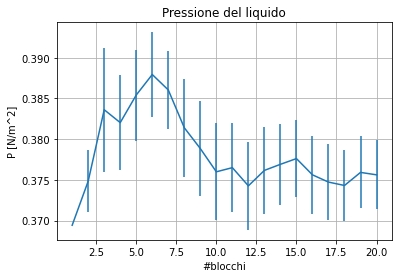

In [24]:
Pres, Pres_err = np.loadtxt("output_presL.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon/pow(sigma,3)

x = np.arange(20)+1

plt.figure()
plt.errorbar(x,Pres,yerr=Pres_err) 
plt.xlabel("#blocchi")
plt.ylabel("P [N/m^2]")
plt.title("Pressione del liquido")
plt.grid(True)
plt.show()

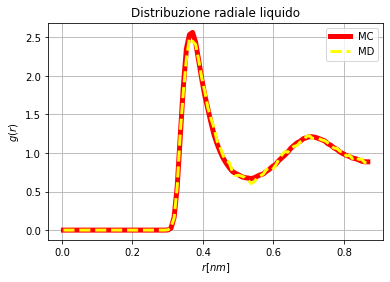

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = (np.arange(100)+0.5)*(108/0.8)**(1/3)/(2*100)*sigma
plt.figure()
gr = np.loadtxt("output_grL.dat", usecols=1)
grMD = np.loadtxt("output_grL_MD.dat", usecols=1)
plt.plot(x,gr, label='MC', linewidth=5, color='r')
plt.plot(x,grMD, label='MD', linewidth=3, color='yellow', linestyle='--')
plt.title("Distribuzione radiale liquido")
plt.xlabel("$r [nm]$")
plt.ylabel("$g(r)$")
plt.legend()
plt.grid()


plt.show()

### <span style="color:green"> Gas

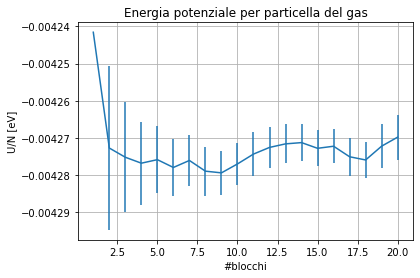

In [26]:
Epot, Epot_err = np.loadtxt("output_epotG.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon

x = np.arange(20)+1

plt.figure()
plt.errorbar(x,Epot,yerr=Epot_err) 
plt.xlabel("#blocchi")
plt.ylabel("U/N [eV]")
plt.title("Energia potenziale per particella del gas")
plt.grid(True)
plt.show()

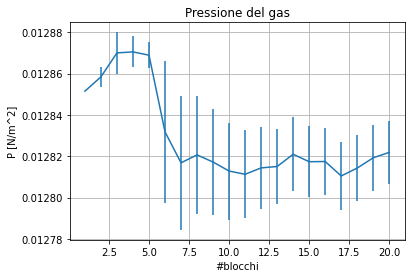

In [27]:
Pres, Pres_err = np.loadtxt("output_presG.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon/pow(sigma,3)

x = np.arange(20)+1

plt.figure()
plt.errorbar(x,Pres,yerr=Pres_err) 
plt.xlabel("#blocchi")
plt.ylabel("P [N/m^2]")
plt.title("Pressione del gas")
plt.grid(True)
plt.show()

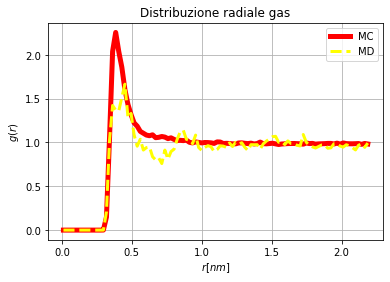

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = (np.arange(100)+0.5)*(108/0.05)**(1/3)/(2*100)*sigma
plt.figure()
gr = np.loadtxt("output_grG.dat", usecols=1)
grMD = np.loadtxt("output_grG_MD.dat", usecols=1)
plt.plot(x,gr, label='MC', linewidth=5, color='r')
plt.plot(x,grMD, label='MD', linewidth=3, color='yellow', linestyle='--')
plt.title("Distribuzione radiale gas")
plt.xlabel("$r [nm]$")
plt.ylabel("$g(r)$")
plt.legend()
plt.grid()


plt.show()

<span style="color:green"> Nel caso di fase solida e liquida l'accordo tra la distribuzione radiale calcolata con la dinamica molecolare e quella ottenuta con il Metropolis è buono, nel caso della fase gassosa la distribuzione radiale ottenuta con la MD si discosta maggiormente da quella attesa (penso sia dovuto al fatto che avevo osservato nell'esercitazione 4 che l'equilibrazione della fase gassosa era meno stabile e portava a temperature superiori a quella attesa).